In [1]:
import pandas as pd
import numpy as np
from google.colab import files
# C:\\Users\\Chris Cahill\Downloads\exam_dataset_ccahill.csv
# files.upload()

In [2]:
# Load dataset
exam_df = pd.read_csv('exam_dataset_ccahill.csv')

## Questions
### Question 1
For each continuous variable:
- 1.1 Find the 95-percent confident interval for the population mean, as well the sample mean, sample median, sample standard deviation, and sample interquartile range.

In [3]:
## Get continous var
exam_df.head()

,ID,gender,employment,income,density,VMT
0,1,Female,Employed,39659,11598,29.7
1,2,Female,Not in labor force,33557,8300,27.1
2,3,Female,Not in labor force,8551,11642,22.4
3,4,Female,Not in labor force,38261,8976,27.6
4,5,Male,Employed,57785,7203,34.3


In [4]:
## Make ID str so as to exclude from summary stat
exam_df['ID'] = exam_df['ID'].astype(str)

#### Below returns population mean CI interval

If population mean is p and sample mean is s

```
Z-score = (p - s)/(sigma/sqrt(n))

To rearrange, (95% CI Z-score)*(sigma/sqrt(n)) = p - s
Or
s +/- (95% CI Z-score)*(sigma/sqrt(n)) = p  
```

In [5]:
sample_means = pd.DataFrame(exam_df[['income', 'density', 'VMT']].mean()).reset_index().rename(columns={0:'mean'})
sample_sigma = pd.DataFrame(exam_df[['income', 'density', 'VMT']].std()).reset_index().rename(columns={0:'std'})
sqrt_n = len(exam_df)**0.5
ci_interval = 1.96 ## aproximating for z-score even though technically we're using sample var --> LLN states if finite sample var that sample var approaches pop var. We could use t-test to be extra careful but that's overkill with this many samples

combo_df = sample_means.merge(sample_sigma, on='index')
combo_df['95_ci_min_bound'] = combo_df['mean'] - ci_interval*combo_df['std']/sqrt_n
combo_df['95_ci_max_bound'] = combo_df['mean'] + ci_interval*combo_df['std']/sqrt_n
combo_df.round(2)

,index,mean,std,95_ci_min_bound,95_ci_max_bound
0,income,45506.12,32069.70,44819.48,46192.76
1,density,9953.70,2499.93,9900.18,10007.23
2,VMT,30.01,3.96,29.92,30.09


Confirm below with true value using non-rounded t-distro, very similar

In [6]:
import scipy.stats as st
# st.t.interval(0.95, len(exam_df[['income']].to_numpy()) - 1, loc=np.mean(exam_df[['income']].to_numpy()), scale=st.sem(exam_df[['income']].to_numpy()))
st.t.interval(0.95, len(exam_df[['density']].to_numpy()) - 1, loc=np.mean(exam_df[['density']].to_numpy()), scale=st.sem(exam_df[['density']].to_numpy()))
# st.t.interval(0.95, len(exam_df[['VMT']].to_numpy()) - 1, loc=np.mean(exam_df[['VMT']].to_numpy()), scale=st.sem(exam_df[['VMT']].to_numpy()))

(array([9900.16909292]), array([10007.2340097]))

#### Below returns sample mean, sample standard deviation, and sample interquartile range.

In [7]:
## Describe exam_df
exam_df.describe()

,income,density,VMT
count,8380.000000,8380.000000,8380.000000
mean,45506.120167,9953.701551,30.006158
std,32069.701928,2499.932987,3.955133
min,528.000000,1430.000000,11.900000
25%,22933.000000,8247.500000,26.900000
50%,36634.500000,9948.000000,30.000000
75%,59508.750000,11670.000000,33.200000
max,373397.000000,18997.000000,41.100000


#### Below returns median

In [8]:
exam_df[['income', 'density', 'VMT']].median()

income     36634.5
density     9948.0
VMT           30.0
dtype: float64

- 1.2 Create a
figure to illustrate each distribution and describe each distribution in a sentence. For example, you
might classify it as approximately normal (perhaps with some left or right skew), approximately log-normal, or bi-modal.


#### Income Distribution:
The income is **NOT** normally distributed; it is roughly log-normal.

<Axes: >

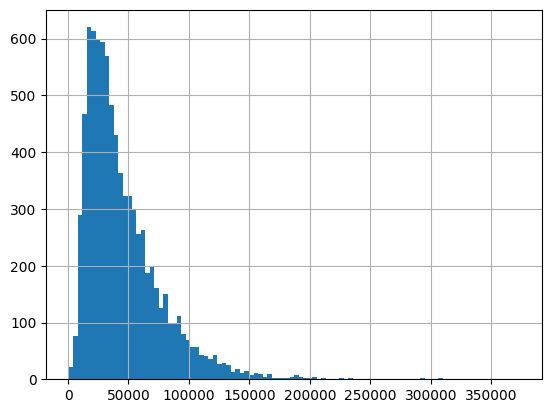

In [9]:
exam_df['income'].hist(bins=100)

In [10]:
exam_df['income'].skew()

1.9758499203897868

In [11]:
exam_df['income'].kurtosis()

7.290255602739082

#### Density Distribution:
The density is normally distributed.

<Axes: >

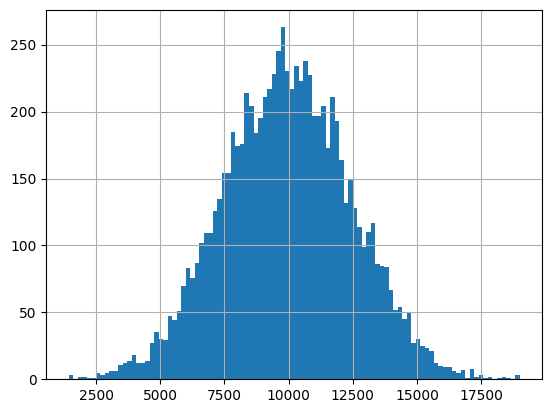

In [12]:
exam_df['density'].hist(bins=100)

In [13]:
exam_df['density'].skew()

0.006151192891662985

In [14]:
exam_df['density'].kurtosis()

-0.03415498871084166

#### VMT Distribution:
The VMT has an imperfect, mostly normal distribution with a longer, modest left tail (perhaps a very modest left skew). Also the relative homogeneity from 27-34 makes it not perfectly normal.

<Axes: >

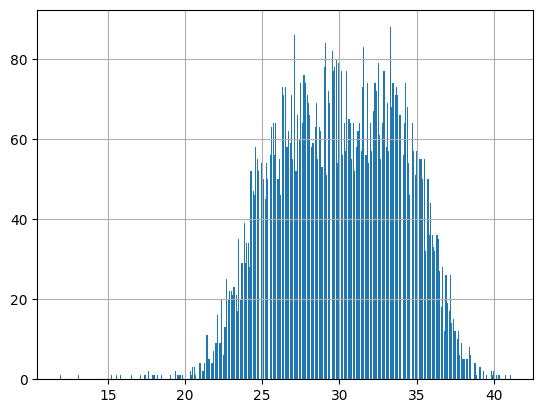

In [15]:
exam_df['VMT'].hist(bins=400)

In [16]:
exam_df['VMT'].skew()

-0.09179257416637225

In [17]:
exam_df['VMT'].kurtosis()

-0.6643322509479583

### Question 2
- 2.1 For each categorical variable, calculate the 95-percent confidence interval for the proportion of the
population in each category.

In [18]:
total_pop = len(exam_df)*1.0
p_df_gender = pd.DataFrame(exam_df.groupby('gender').size()).reset_index().rename(columns={0:'count'})
p_df_gender['percent'] = p_df_gender['count']/total_pop
p_df_gender

,gender,count,percent
0,Female,4309,0.514200
1,Male,4051,0.483413
2,Non-binary,20,0.002387


```
p = p_s +/- (95% CI interval)*sqrt(p_s(1-p_s)/n)

p = true pop proportion
p_s = sample pop proportion

```

In [19]:
p_df_gender['95_ci_min_bound'] = p_df_gender['percent'] - ci_interval*(p_df_gender['percent']*(1 - p_df_gender['percent'])/len(exam_df))**0.5
p_df_gender['95_ci_max_bound'] = p_df_gender['percent'] + ci_interval*(p_df_gender['percent']*(1 - p_df_gender['percent'])/len(exam_df))**0.5
p_df_gender

,gender,count,percent,95_ci_min_bound,95_ci_max_bound
0,Female,4309,0.514200,0.503499,0.524902
1,Male,4051,0.483413,0.472713,0.494112
2,Non-binary,20,0.002387,0.001342,0.003431


In [20]:
## Check using built-in
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

# Females
print('Females')
print(proportion_confint(count=4309, nobs=len(exam_df), alpha=0.05))

# Males
print('Males')
print(proportion_confint(count=4051, nobs=len(exam_df), alpha=0.05))

# NB
print('Non-binary')
print(proportion_confint(count=20, nobs=len(exam_df), alpha=0.05))

Females
(0.5034995636342371, 0.5249013910197008)
Males
(0.47271354809985305, 0.4941122275564715)
Non-binary
(0.0013419141454355324, 0.0034313555443019382)


Repeat for Employment

In [21]:
total_pop = len(exam_df)*1.0
p_df_empl = pd.DataFrame(exam_df.groupby('employment').size()).reset_index().rename(columns={0:'count'})
p_df_empl['percent'] = p_df_empl['count']/total_pop
p_df_empl['95_ci_min_bound'] = p_df_empl['percent'] - ci_interval*(p_df_empl['percent']*(1 - p_df_empl['percent'])/len(exam_df))**0.5
p_df_empl['95_ci_max_bound'] = p_df_empl['percent'] + ci_interval*(p_df_empl['percent']*(1 - p_df_empl['percent'])/len(exam_df))**0.5
p_df_empl

,employment,count,percent,95_ci_min_bound,95_ci_max_bound
0,Employed,4396,0.524582,0.513890,0.535275
1,Not in labor force,3562,0.425060,0.414475,0.435644
2,Unemployed,422,0.050358,0.045676,0.055040


- 2.2 Create one or more figures to illustrate these proportions. Your figures
should also indicate the uncertainty associated with the estimated proportions.

Gender

In [22]:
p_df_gender['error'] = p_df_gender['percent'] - p_df_gender['95_ci_min_bound']

([<matplotlib.axis.XTick at 0x79b8909bea40>,
 [Text(1, 0, 'Female'), Text(2, 0, 'Male'), Text(3, 0, 'Non-binary')])

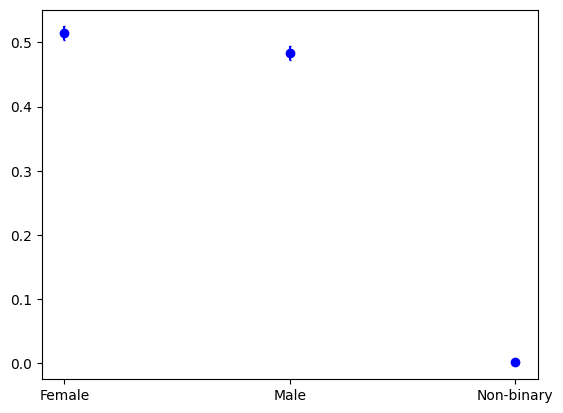

In [23]:
import matplotlib.pyplot as plt

x = [1, 2, 3]
y = list(p_df_gender['percent'])
errors = list(p_df_gender['error'])

plt.figure()
plt.errorbar(x, y, yerr=errors, fmt='o', color = 'b', barsabove=True, capsize=1)
plt.xticks((1, 2, 3), list(p_df_gender['gender']))

Employment

In [24]:
p_df_empl['error'] = p_df_empl['percent'] - p_df_empl['95_ci_min_bound']

([<matplotlib.axis.XTick at 0x79b890a4e290>,
 [Text(1, 0, 'Employed'),
  Text(2, 0, 'Not in labor force'),
  Text(3, 0, 'Unemployed')])

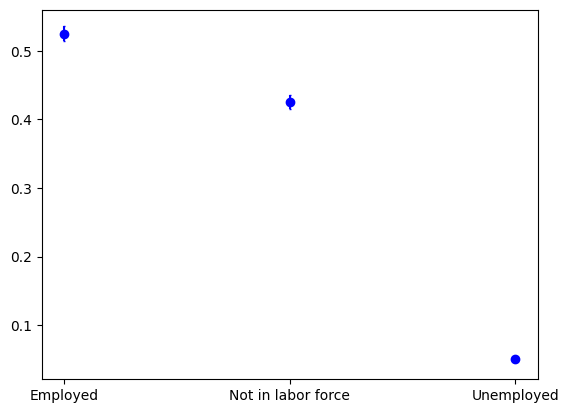

In [25]:
import matplotlib.pyplot as plt

x = [1, 2, 3]
y = list(p_df_empl['percent'])
errors = list(p_df_empl['error'])

plt.figure()
plt.errorbar(x, y, yerr=errors, fmt='o', color = 'b', barsabove=True, capsize=1)
plt.xticks((1, 2, 3), list(p_df_empl['employment']))

### Question 3

Select an appropriate statistical test to determine the relationships between the following pairs of
variables.

Report a p-value for each relationship and indicate whether the relationship is statistically
significant.

- Density and income
- VMT and whether a person is employed (i.e. two employment categories: employed and not
employed)

In [26]:
# EDA to see what I'm getting into
exam_df.corr()

<ipython-input-26-399083497c77>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  exam_df.corr()


,income,density,VMT
income,1.000000,-0.005135,0.827942
density,-0.005135,1.000000,-0.089863
VMT,0.827942,-0.089863,1.000000


#### Density and Income

In [27]:
# As we see from above, density and income are not correlated.

# Null hypo: no relationship between income and density
# Alt. hypo: anything else

from scipy.stats import pearsonr

pearsonr(exam_df['density'], exam_df['income'])

PearsonRResult(statistic=-0.00513480627382569, pvalue=0.6383656204834977)

With a p-value of ~0.64 we **fail** to reject the null hypothesis--meaning we cannot ascertain a (linear) statistical relationship between density and income with **any** (0.1, 0.05, 0.01, it's way too high) confidence.

An alternative that's deeply related to the Pearson Correlation Coefficient for linear relationships between two variables would be a one variable regression, which you could then calculate the p-value for Beta_1 (linear multiplier between the variables).

#### VMT and Employment

In [28]:
# VMT and employment
exam_df['employment_binary'] = exam_df['employment'].apply(lambda x: 1 if x == 'Employed' else 0)

# Z-test between two categories of employment and VMT
exam_df[['employment_binary', 'VMT']].head()

,employment_binary,VMT
0,1,29.7
1,0,27.1
2,0,22.4
3,0,27.6
4,1,34.3


In [29]:
print(exam_df[exam_df['employment_binary'] == 1]['VMT'].mean())
print(exam_df[exam_df['employment_binary'] == 0]['VMT'].mean())

32.730095541401276
27.000527108433737


In [30]:
import statsmodels

x1=list(exam_df[exam_df['employment_binary'] == 1]['VMT'])
x2=list(exam_df[exam_df['employment_binary'] == 0]['VMT'])
statsmodels.stats.weightstats.ztest(x1, x2, value=0)

(95.9268281708939, 0.0)

The p-value is literally almost 0 for a z-score of ~96. They definitively have different VMT behavior for different employment status. Note: I used a z-test because of the sample-size (overkill for t-test) and since we were specified to collapse the three employment categories into two, allowing us to avoid ANOVA.

### Question 4
Estimate a linear regression model predicting VMT based on gender, employment, income, and density.
Show the results of the model, and write a brief description indicating how well the model fits the data
and interpreting each regression coefficient

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression
import math

In [32]:
# Encoding to 0/1
# Dropping first for gender, empl (reference?)
encoding_gender = pd.get_dummies(exam_df['gender'], drop_first=True)
encoding_empl = pd.get_dummies(exam_df['employment'], drop_first=True)

# Need to convert income to log_income since it's not normally distributed so it breaks down the assumptions of OLS regression, which require normality
model_data = exam_df[['income', 'density']]
model_data['log_income'] = model_data['income'].apply(lambda x: math.log(x))

# Scaling density so easier to interpret coef values
model_data['density_scaled'] = model_data['density']/(model_data['density'].max()*1.0)

X = model_data[['log_income', 'density_scaled']].join(encoding_gender).join(encoding_empl)
y = exam_df['VMT']

<ipython-input-32-a0ae76de8438>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['log_income'] = model_data['income'].apply(lambda x: math.log(x))
<ipython-input-32-a0ae76de8438>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['density_scaled'] = model_data['density']/(model_data['density'].max()*1.0)


In [33]:
# m = LinearRegression()
# m.fit(X, y)
# m.score(X, y)
# m.coef_
# m.intercept_


In [34]:
## Whoops repeating with alternative Python library to get neater results (AND ADDING CONSTANT/INTERCEPT!)
import statsmodels.api as sm

X = sm.add_constant(X)
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    VMT   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 3.094e+05
Date:                Fri, 18 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:56:00   Log-Likelihood:                -762.45
No. Observations:                8380   AIC:                             1539.
Df Residuals:                    8373   BIC:                             1588.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -8.3646      0

Since there are two categorical variables that are being exploded out via the 'get dummies' in Pandas function, if I had more time I would research if I did the right thing by dropping a reference for **each** category.

Ex.

y = b1 + (male)*b2 + (female)*b3

vs.

y = b1 + (female)*b2

where male/female are 0/1 but I cannot remember these rules for multiple categories off the top of my head for time's sake.

### Model Results

The model fits very well, given the adjusted R2 > 0.99

Through the summary function, we see the p-values determined by the t-test on the individual variables are all very significant (past 0.01) EXCEPT for non-binary gender, which was not statistically significant.

## Appendix

Last ditch effort to make clearer box plots for Q2!

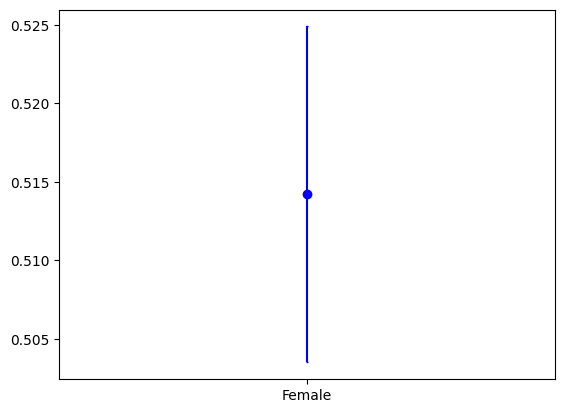

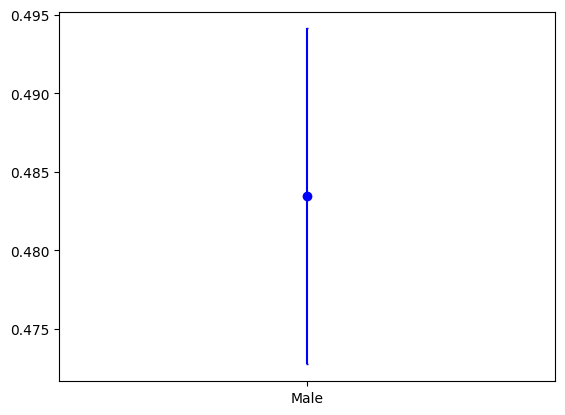

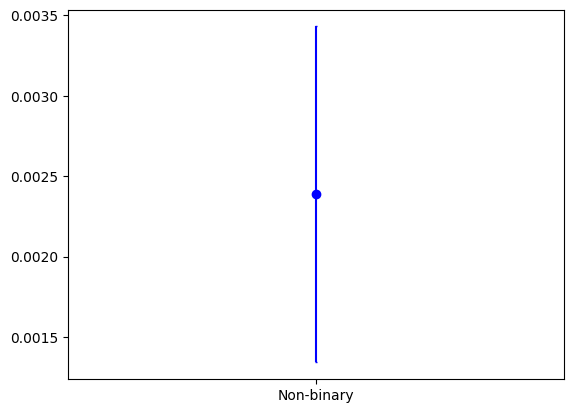

In [35]:
import matplotlib.pyplot as plt

for i in range(0, len(p_df_gender)):
  x = [1]
  y = [p_df_gender.iloc[i]['percent']]
  errors = [p_df_gender.iloc[i]['error']]

  plt.figure()
  plt.errorbar(x, y, yerr=errors, fmt='o', color = 'b', barsabove=True, capsize=1)
  plt.xticks((1, ), (p_df_gender.iloc[i]['gender'], ))

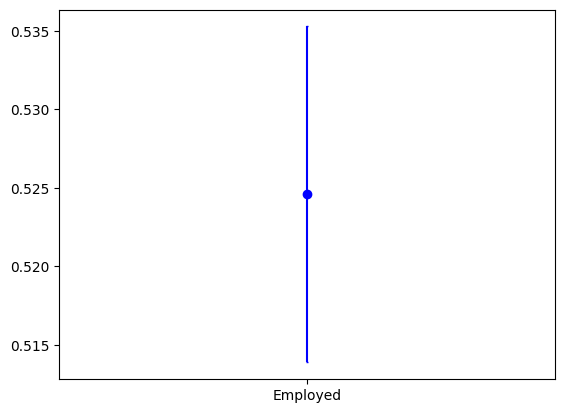

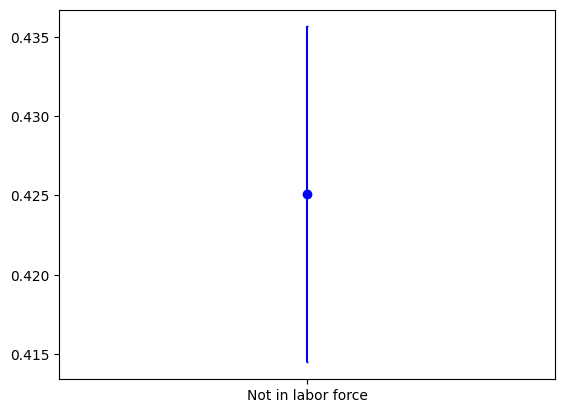

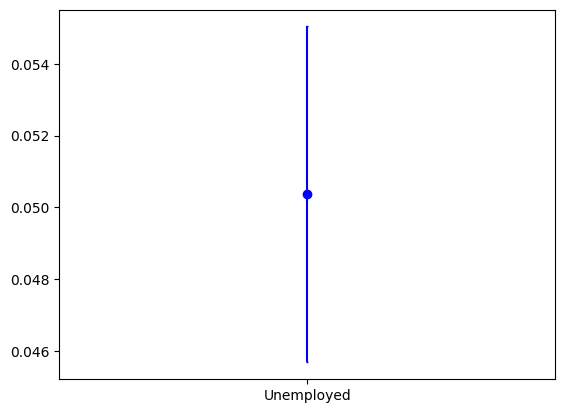

In [36]:
import matplotlib.pyplot as plt

for i in range(0, len(p_df_empl)):
  x = [1]
  y = [p_df_empl.iloc[i]['percent']]
  errors = [p_df_empl.iloc[i]['error']]

  plt.figure()
  plt.errorbar(x, y, yerr=errors, fmt='o', color = 'b', barsabove=True, capsize=1)
  plt.xticks((1, ), (p_df_empl.iloc[i]['employment'], ))